In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

# Load the IMDB dataset from CSV
df = pd.read_csv('imdb_dataset.csv')

In [2]:
# Preprocess the data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=100)
print(X)

[[ 123  210 3241 ...  125 4103  486]
 [ 175 3336   96 ... 1977   69  221]
 [  10  190    9 ...   63   16  350]
 ...
 [   7   30   86 ...    2    2 6050]
 [8462 5548    2 ...   67  739   42]
 [ 116  699  479 ...  794   11   17]]


In [3]:
# Convert labels to numerical values
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 100)
(10000, 100)
(40000,)
(10000,)


In [4]:
# Build the model
model = Sequential()
model.add(Embedding(10000, 32, input_length=100))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

C:\Users\Mr.ACE\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6694 - loss: 0.6043 - val_accuracy: 0.8547 - val_loss: 0.3315
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8912 - loss: 0.2710 - val_accuracy: 0.8665 - val_loss: 0.3130
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9357 - loss: 0.1854 - val_accuracy: 0.8652 - val_loss: 0.3181
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9734 - loss: 0.1092 - val_accuracy: 0.8559 - val_loss: 0.3484
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9914 - loss: 0.0613 - val_accuracy: 0.8539 - val_loss: 0.3682
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9974 - loss: 0.0325 - val_accuracy: 0.8537 - val_loss: 0.3960
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9988 - loss: 0.0184 - val_accuracy: 0.8525 - val_loss: 0.4240
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9996 - loss: 0.0107 - val_accuracy: 0.

In [6]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [7]:
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']

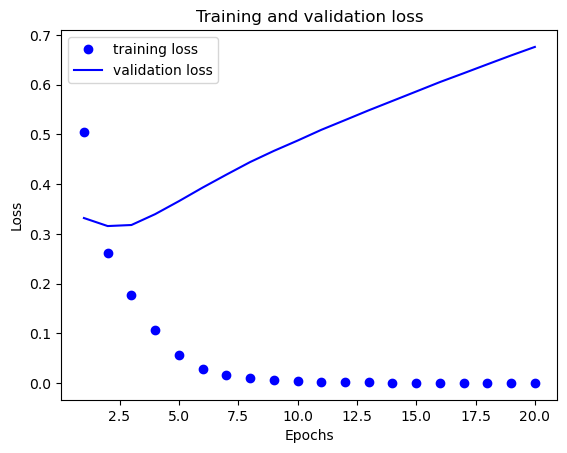

In [8]:
#plotting training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss,'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.8539
Test Accuracy: 0.8539000153541565


Let's break down the provided Python code and explain each part in detail:

 1. Importing Libraries and Modules
```python
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
```
- Explanation: This section imports necessary libraries and modules:
  - `pandas` for data manipulation.
  - `train_test_split` from `sklearn.model_selection` to split data into training and testing sets.
  - `Tokenizer` from `tensorflow.keras.preprocessing.text` for text tokenization.
  - `pad_sequences` from `tensorflow.keras.preprocessing.sequence` to pad sequences to a maximum length.
  - `Sequential`, `Dense`, `Embedding`, and `Flatten` from `tensorflow.keras.models` and `tensorflow.keras.layers` for building the neural network model.

 2. Loading and Preprocessing Data
```python
df = pd.read_csv('imdb_dataset.csv')
```
- Explanation: This code loads the IMDb dataset from a CSV file named `'imdb_dataset.csv'` into a pandas DataFrame (`df`).

 3. Text Tokenization and Padding
```python
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=100)
```
- Explanation: Here, the text data (`'review'` column in `df`) is tokenized using `Tokenizer` and converted into sequences of integers (`X`). The sequences are then padded to a maximum length of 100 using `pad_sequences`.

 4. Data Splitting and Label Conversion
```python
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- Explanation: The target variable (`'sentiment'`) is converted to numerical values (`1` for `'positive'` and `0` for `'negative'`). The data (`X`, `y`) is split into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets using `train_test_split` with a test size of `0.2` (20% of the data).

 5. Building the Neural Network Model
```python
model = Sequential()
model.add(Embedding(10000, 32, input_length=100))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
```
- Explanation: This code defines a simple feedforward neural network model using `Sequential` from Keras:
  - `Embedding` layer with vocabulary size `10000`, embedding dimension `32`, and input length `100`.
  - `Flatten` layer to flatten the output from the `Embedding` layer.
  - `Dense` layer with `1` unit and `sigmoid` activation function for binary classification.
  - The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy metric.

 6. Model Training
```python
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
```
- Explanation: The model is trained using the `fit` method on the training data (`X_train`, `y_train`) with `20` epochs, `64` as the batch size, and a validation split of `0.2` (20% of the training data).

 7. Visualizing Training History
```python
history_dict = history.history
```
- Explanation: The training history (`history.history`) is stored in a dictionary (`history_dict`).

 8. Plotting Training and Validation Loss
```python
import matplotlib.pyplot as plt
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
```
- Explanation: This code uses `matplotlib` to plot the training and validation loss over epochs for visual analysis.

 9. Plotting Training and Validation Accuracy
```python
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
```
- Explanation: This code plots the training and validation accuracy over epochs for visual analysis.

 10. Model Evaluation
```python
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
```
- Explanation: Finally, the trained model is evaluated on the test data (`X_test`, `y_test`) to compute the test accuracy (`accuracy`).

Each part of the code serves a specific purpose in the machine learning workflow, from data loading and preprocessing to model building, training, evaluation, and result visualization. The detailed explanations provided above should help in understanding the functionality and usage of each component within the context of text classification using a neural network.



GROUP – A 
Assignment No: 2 
==================================================================== 
Title: Binary classification using Deep Neural Networks Example: Classify movie reviews into positive” reviews and “negative” reviews, just based on the text content of the reviews. Use IMDB dataset. 
=====================================================================Objective: 
To learn about Deep Neural Network. 
To understand the concept of classification using Deep Learning. 
===================================================================== 
Theory: 
. What is Classification? 
 The act or method of distributing into a class or category according to characteristics. 
 The model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data. 
Figure 1: Classification 
. What is Deep Neural Network? 
 A deep neural network is a type of machine learning algorithm that is modeled after the structure and function of the human brain. It consists of multiple layers of interconnected nodes, or artificial neurons that process data and learn from it to make predictions or classifications. 
. How Deep Neural Network works in classification? 
 Deep neural networks are commonly used for classification tasks because they can automatically learn to extract relevant features from raw input data and map them to the correct output class. 
 The basic architecture of a deep neural network for classification consists of three main parts: an input layer, one or more hidden layers, and an output layer. The input layer receives the raw input data, which is usually preprocessed to a fixed size and format. The hidden layers are composed of neurons that apply linear transformations and nonlinear activations to the input features to extract relevant patterns and representations. Finally, the output layer produces the predicted class labels, usually as a probability distribution over the possible classes. 
 During training, the deep neural network learns to adjust its weights and biases in each layer to minimize the difference between the predicted output and the true labels. This is typically done by optimizing a loss function that measures the discrepancy between the predicted and true labels, using techniques such as gradient descent or stochastic gradient descent. 
 One of the key advantages of deep neural networks for classification is their ability to learn hierarchical representations of the input data.  
 In a deep neural network with multiple hidden layers, each layer learns to capture more complex and abstract features than the previous layer, by building on the representations learned by the earlier layers. This hierarchical structure allows deep neural networks to learn highly discriminative features that can separate different classes of input data, even when the data is highly complex or noisy. 
 Overall, the effectiveness of deep neural networks for classification depends on the choice of architecture, hyperparameters, and training procedure, as well as the quality and quantity of the training data. When trained properly, deep neural networks can achieve stateoftheart performance on a wide range of classification tasks, from image recognition to natural language processing. 
. IMDB Dataset 
 The IMDB dataset is a large collection of movie reviews collected from the IMDB. website, which is a popular source of usergenerated movie ratings and reviews. The dataset consists of 50,000 movie reviews, split into 25,000 reviews for training and 25,000 reviews for testing. 
 Each review is represented as a sequence of words, where each word is represented by an integer index based on its frequency in the dataset. The labels for each review are binary, with 0 indicating a negative review and 1 indicating a positive review. 
 The IMDB dataset is commonly used as a benchmark for sentiment analysis and text classification tasks, where the goal is to classify the movie reviews as either positive or negative based on their text content. 
 The dataset is challenging because the reviews are often highly subjective and can contain complex language and nuances of meaning, making it difficult for traditional machine learning approaches to accurately classify them. 
 Deep learning approaches, such as deep neural networks, have achieved stateoftheart performance on the IMDB dataset by automatically learning to extract relevant features from the raw text data and map them to the correct output class. The IMDB dataset is widely used in research and education for natural language processing and machine learning, as it provides a rich source of labeled text data for training and testing deep learning models.  
===================================================================== 
Conclusion: In this way we can Classify the Movie Reviews by using DNN. 
